In [49]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg



sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib notebook

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13
squidpy==1.5.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# checkout visium data using scanpy, squidpy packages, for reference see (https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html)

In [4]:
folder = '/data/runs/samples/Vis1_A1/outVis1_A1_210610/outs'


In [68]:
adata_st_test = sc.read_visium(path = folder, count_file='filtered_feature_bc_matrix.h5')

In [6]:
adata_st_test

AnnData object with n_obs × n_vars = 3529 × 27998
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
adata_st_test.obs

in_tissue  array_row  array_col
AAACAACGAATAGTTC-1          1          0         16
AAACAAGTATCTCCCA-1          1         50        102
AAACAATCTACTAGCA-1          1          3         43
AAACACCAATAACTGC-1          1         59         19
AAACAGCTTTCAGAAG-1          1         43          9
...                       ...        ...        ...
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27
TTGTTTGTATTACACG-1          1         73         41
TTGTTTGTGTAAATTC-1          1          7         51

[3529 rows x 3 columns]

In [8]:
adata_st_test.var

gene_ids    feature_types genome
Xkr4            ENSMUSG00000051951  Gene Expression   mm10
Gm1992          ENSMUSG00000089699  Gene Expression   mm10
Gm37381         ENSMUSG00000102343  Gene Expression   mm10
Rp1             ENSMUSG00000025900  Gene Expression   mm10
Rp1             ENSMUSG00000109048  Gene Expression   mm10
...                            ...              ...    ...
AC168977.1      ENSMUSG00000079808  Gene Expression   mm10
PISD            ENSMUSG00000095041  Gene Expression   mm10
DHRSX           ENSMUSG00000063897  Gene Expression   mm10
Vmn2r122        ENSMUSG00000096730  Gene Expression   mm10
CAAA01147332.1  ENSMUSG00000095742  Gene Expression   mm10

[27998 rows x 3 columns]

In [10]:
adata_st_test.obsm['spatial']

array([[ 847, 1762],
       [3553, 4428],
       [1011, 2600],
       ...,
       [3279, 2100],
       [4793, 2532],
       [1227, 2848]])

In [53]:
adata_st_test.obsm['spatial'].shape

(3529, 2)

In [85]:
#check where positions were mapped on to tissue 
adata_st_test.obs['thing'] = 'a'


In [71]:
adata_st_test.var_names_make_unique()

In [72]:
adata_st_test

AnnData object with n_obs × n_vars = 3529 × 27998
    obs: 'in_tissue', 'array_row', 'array_col', 'thing'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

In [13]:
adata_st_test.var

gene_ids    feature_types genome
Xkr4            ENSMUSG00000051951  Gene Expression   mm10
Gm1992          ENSMUSG00000089699  Gene Expression   mm10
Gm37381         ENSMUSG00000102343  Gene Expression   mm10
Rp1             ENSMUSG00000025900  Gene Expression   mm10
Rp1-1           ENSMUSG00000109048  Gene Expression   mm10
...                            ...              ...    ...
AC168977.1      ENSMUSG00000079808  Gene Expression   mm10
PISD            ENSMUSG00000095041  Gene Expression   mm10
DHRSX           ENSMUSG00000063897  Gene Expression   mm10
Vmn2r122        ENSMUSG00000096730  Gene Expression   mm10
CAAA01147332.1  ENSMUSG00000095742  Gene Expression   mm10

[27998 rows x 3 columns]

In [73]:
adata_st_test.var["mt"] = adata_st_test.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_st_test, qc_vars=["mt"], inplace=True)

In [74]:
#check to make sure 'pct_counts_mt' are actual values, not zero
adata_st_test.obs

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACAACGAATAGTTC-1          1          0         16     a               4870   
AAACAAGTATCTCCCA-1          1         50        102     a               2373   
AAACAATCTACTAGCA-1          1          3         43     a               2557   
AAACACCAATAACTGC-1          1         59         19     a               3701   
AAACAGCTTTCAGAAG-1          1         43          9     a               4988   
...                       ...        ...        ...   ...                ...   
TTGTTTCACATCCAGG-1          1         58         42     a               2750   
TTGTTTCATTAGTCTA-1          1         60         30     a               2833   
TTGTTTCCATACAACT-1          1         45         27     a               3220   
TTGTTTGTATTACACG-1          1         73         41     a               3137   
TTGTTTGTGTAAATTC-1          1          7         51     a               3323   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAACGAATAGTTC-1                 8.491055       14428.0            9.576996   
AAACAAGTATCTCCCA-1                 7.772332        5057.0            8.528727   
AAACAATCTACTAGCA-1                 7.846981        4825.0            8.481773   
AAACACCAATAACTGC-1                 8.216628        9667.0            9.176577   
AAACAGCTTTCAGAAG-1                 8.514991       14997.0            9.615672   
...                                     ...           ...                 ...   
TTGTTTCACATCCAGG-1                 7.919720        6639.0            8.800867   
TTGTTTCATTAGTCTA-1                 7.949444        6375.0            8.760296   
TTGTTTCCATACAACT-1                 8.077447        9131.0            9.119540   
TTGTTTGTATTACACG-1                 8.051341        7091.0            8.866723   
TTGTTTGTGTAAATTC-1                 8.108924        7578.0            8.933137   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAACGAATAGTTC-1                   24.189077                    29.685334   
AAACAAGTATCTCCCA-1                   32.687364                    38.263793   
AAACAATCTACTAGCA-1                   20.082902                    26.487047   
AAACACCAATAACTGC-1                   25.892211                    31.716148   
AAACAGCTTTCAGAAG-1                   24.518237                    29.792625   
...                                        ...                          ...   
TTGTTTCACATCCAGG-1                   30.667269                    36.978461   
TTGTTTCATTAGTCTA-1                   25.113725                    31.498039   
TTGTTTCCATACAACT-1                   33.326032                    39.196145   
TTGTTTGTATTACACG-1                   28.571429                    34.762375   
TTGTTTGTGTAAATTC-1                   22.882027                    28.477171   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAACGAATAGTTC-1                    37.004436                    50.242584   
AAACAAGTATCTCCCA-1                    45.699031                    59.422583   
AAACAATCTACTAGCA-1                    35.150259                    50.901554   
AAACACCAATAACTGC-1                    39.722768                    53.832626   
AAACAGCTTTCAGAAG-1                    36.787357                    49.283190   
...                                         ...                          ...   
TTGTTTCACATCCAGG-1                    45.564091                    59.783100   
TTGTTTCATTAGTCTA-1                    40.439216                    55.858824   
TTGTTTCCATACAACT-1                    47.201840                    60.519111   
TTGTTTGTATTACACG-1                    42.490481                    55.859540   
TTGTTTGTGTAAATTC-1                    36.302454                    50.989707   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAACGAATAGTTC-1           2197.0               7.695303      15.227336  
AAACAAGTATCTCCCA-1      

In [16]:
adata_st_test

AnnData object with n_obs × n_vars = 3529 × 27998
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<IPython.core.display.Javascript object>


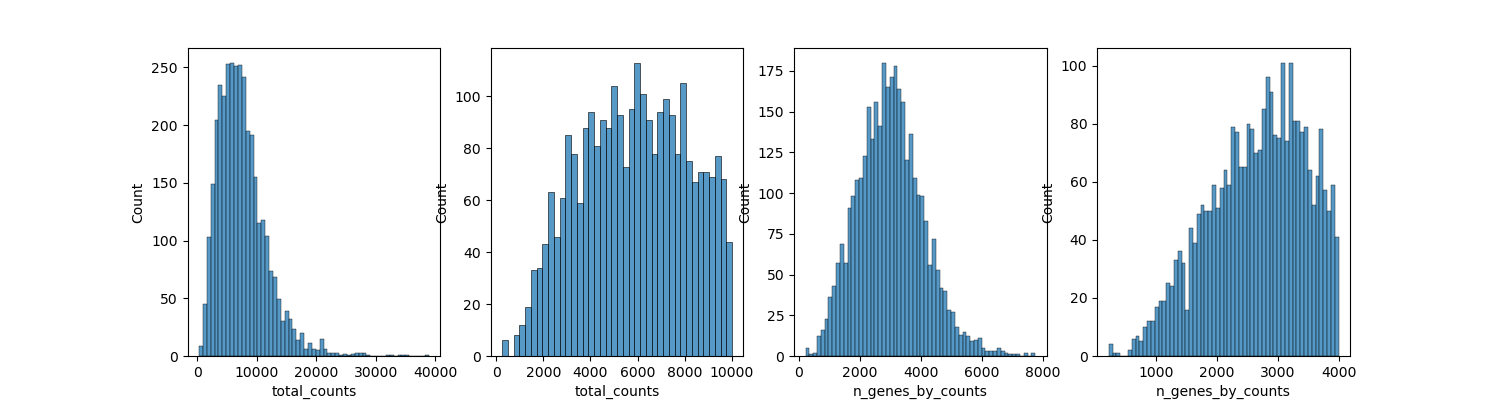

In [75]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata_st_test.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata_st_test.obs["total_counts"][adata_st_test.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata_st_test.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata_st_test.obs["n_genes_by_counts"][adata_st_test.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)
plt.show()

<IPython.core.display.Javascript object>


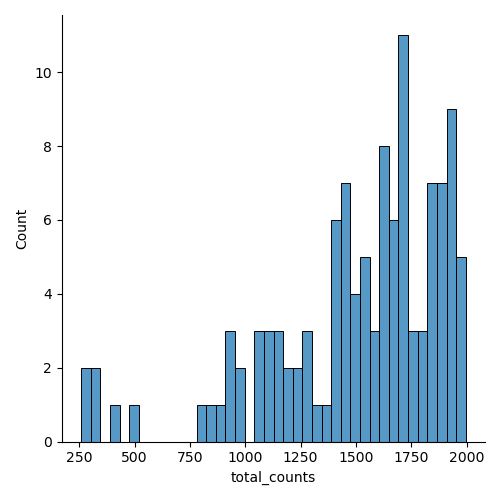

In [76]:
sns.displot(adata_st_test.obs['total_counts'][adata_st_test.obs["total_counts"]<2000],kde = False, bins = 40)

In [77]:
sc.pp.filter_cells(adata_st_test, min_counts=1100)
sc.pp.filter_cells(adata_st_test, max_counts=20000)


<IPython.core.display.Javascript object>


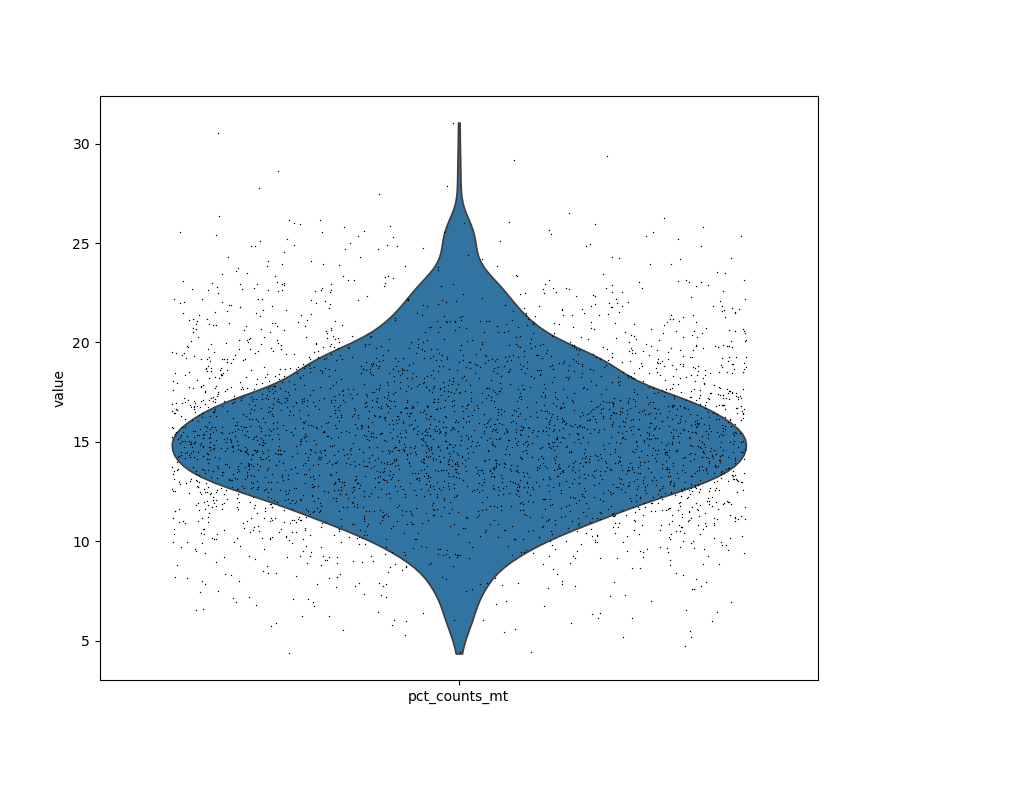

In [78]:
sc.pl.violin(adata_st_test,['pct_counts_mt'],jitter = 0.4)

In [79]:
adata_st_test

AnnData object with n_obs × n_vars = 3453 × 27998
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

In [80]:
adata_st_test = adata_st_test[adata_st_test.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata_st_test.n_obs}")
sc.pp.filter_genes(adata_st_test, min_cells=10)

#cells after MT filter: 3093


In [81]:
adata_st_test

AnnData object with n_obs × n_vars = 3093 × 15091
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

In [70]:
#pre filtering
plt.rcParams["figure.figsize"] = (8,8)
sc.pl.spatial(adata_st_test, color='thing')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


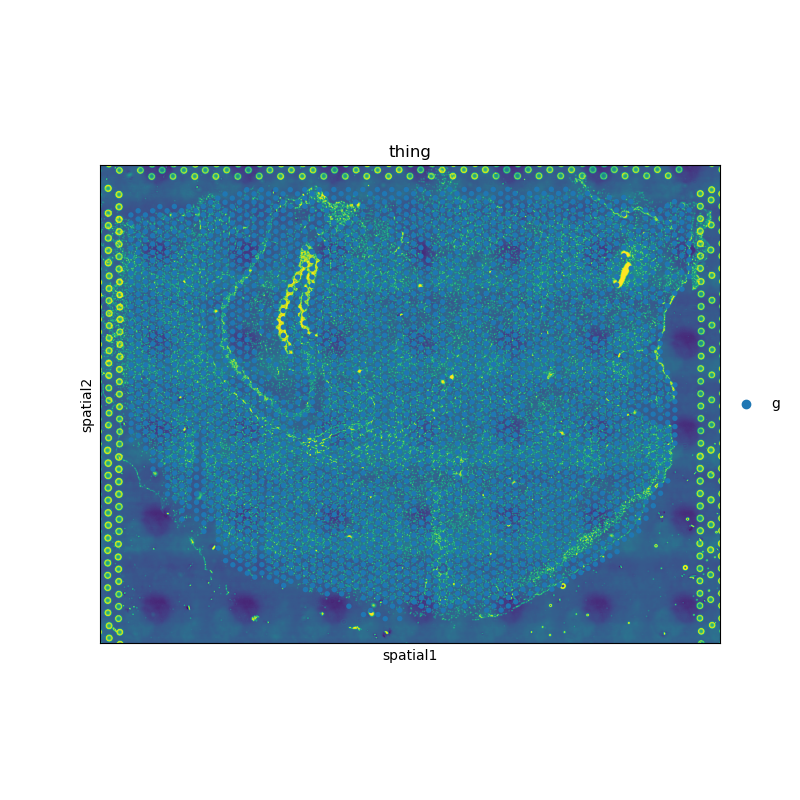

In [84]:
#post filtering
plt.rcParams["figure.figsize"] = (8,8)
sc.pl.spatial(adata_st_test, color='thing')

In [86]:
sc.pp.normalize_total(adata_st_test, inplace=True)
sc.pp.log1p(adata_st_test)
sc.pp.highly_variable_genes(adata_st_test, flavor="seurat", n_top_genes=2000)

In [23]:
adata_st_test

AnnData object with n_obs × n_vars = 2495 × 15081
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [87]:
sc.pp.pca(adata_st_test)
sc.pp.neighbors(adata_st_test)
sc.tl.umap(adata_st_test)
sc.tl.leiden(
    adata_st_test, key_added="clusters", flavor="igraph", directed=False, n_iterations=2
)

<IPython.core.display.Javascript object>


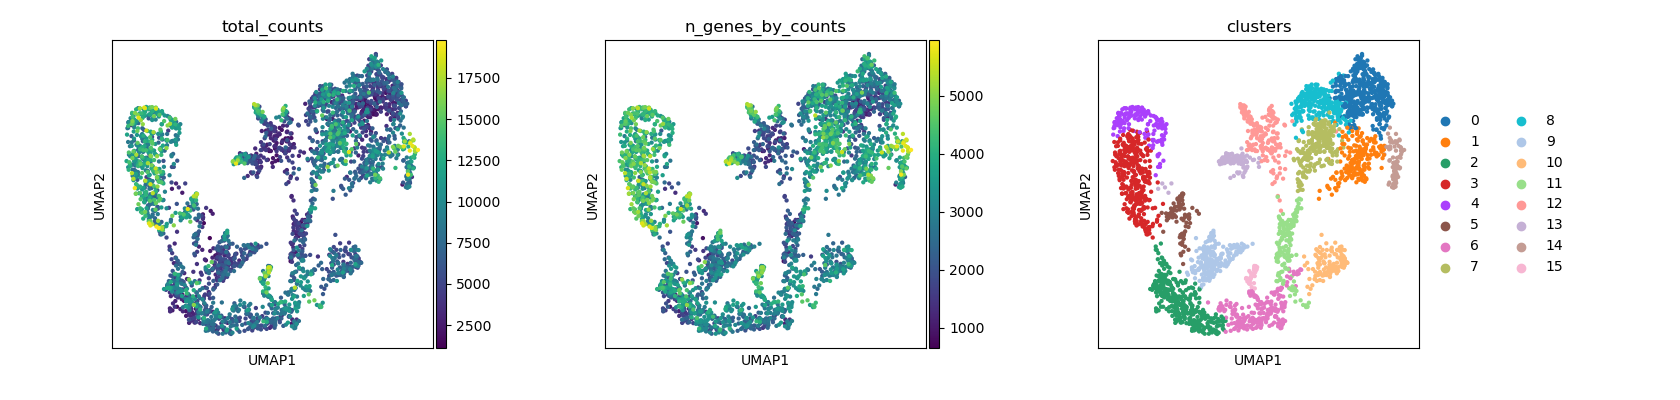

In [88]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_st_test, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

<IPython.core.display.Javascript object>


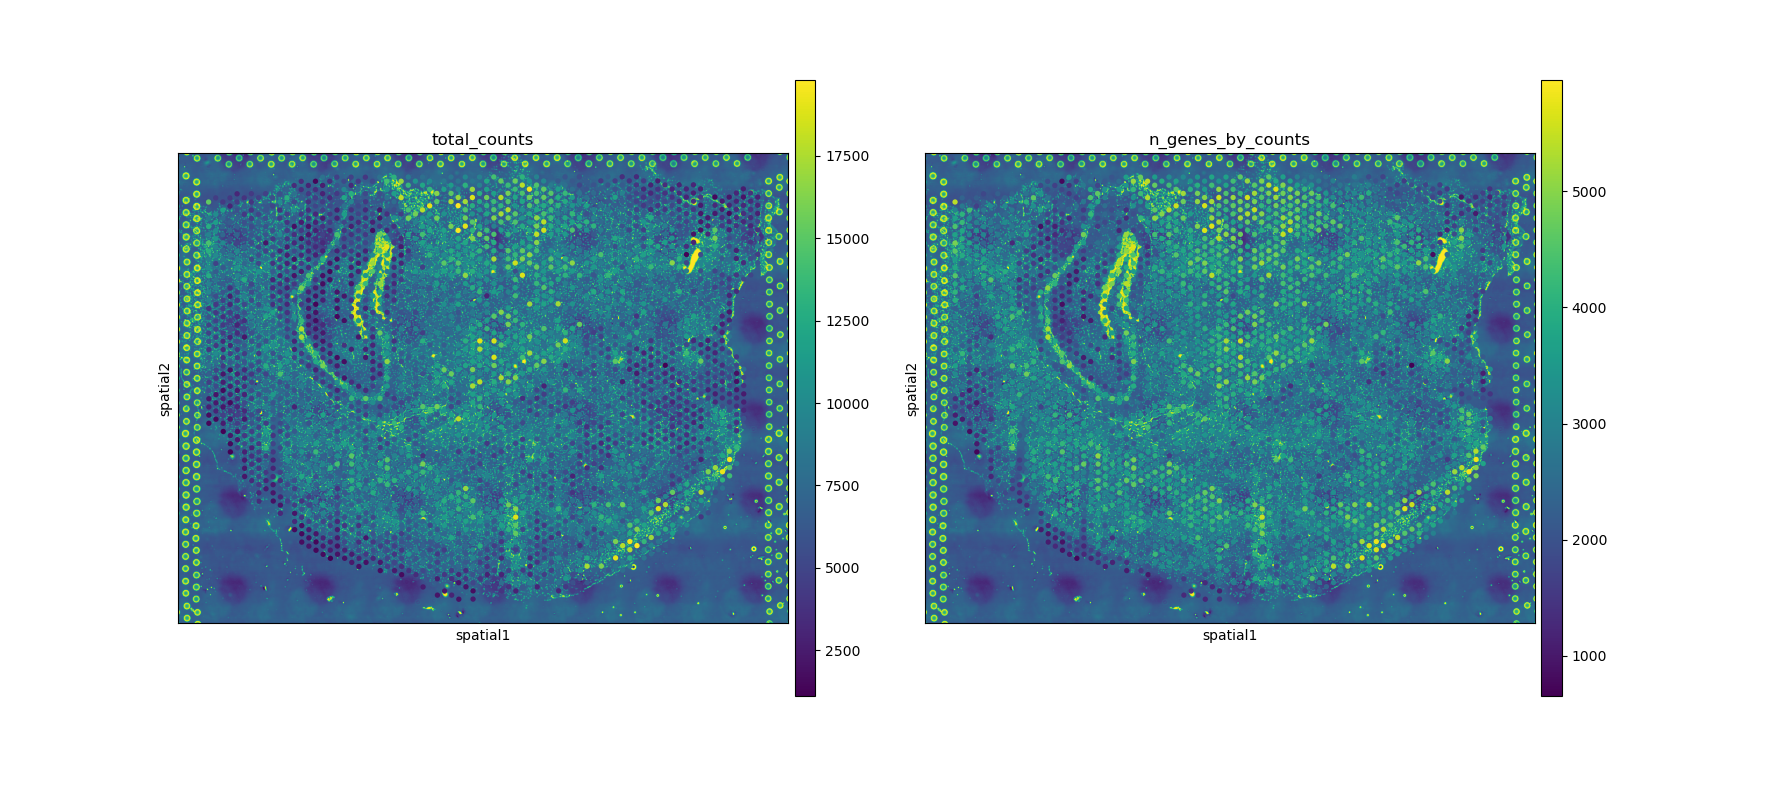

In [91]:
plt.rcParams["figure.figsize"] = (8,8)
sc.pl.spatial(adata_st_test, img_key="hires", color = ["total_counts","n_genes_by_counts"])

In [27]:
adata_st_test

AnnData object with n_obs × n_vars = 2495 × 15081
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'clusters', 'clusters_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

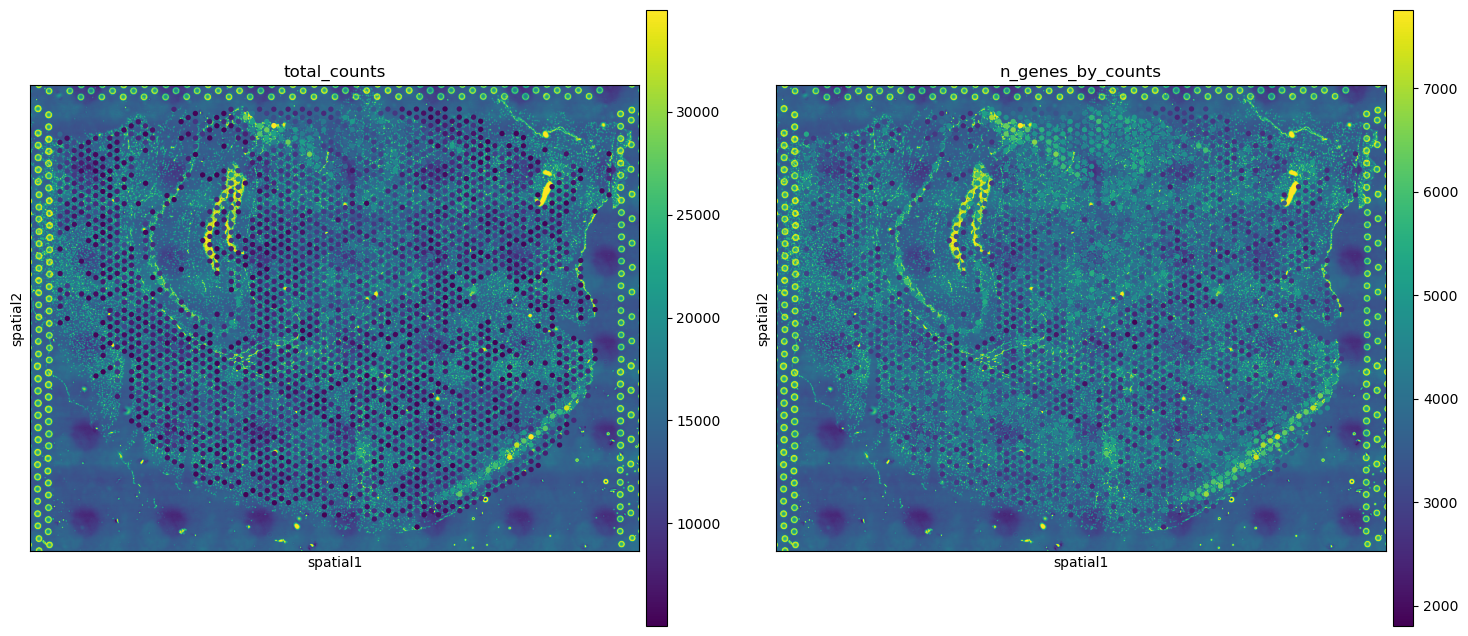

In [28]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_st_test, img_key="hires", color=["total_counts", "n_genes_by_counts"])

<IPython.core.display.Javascript object>


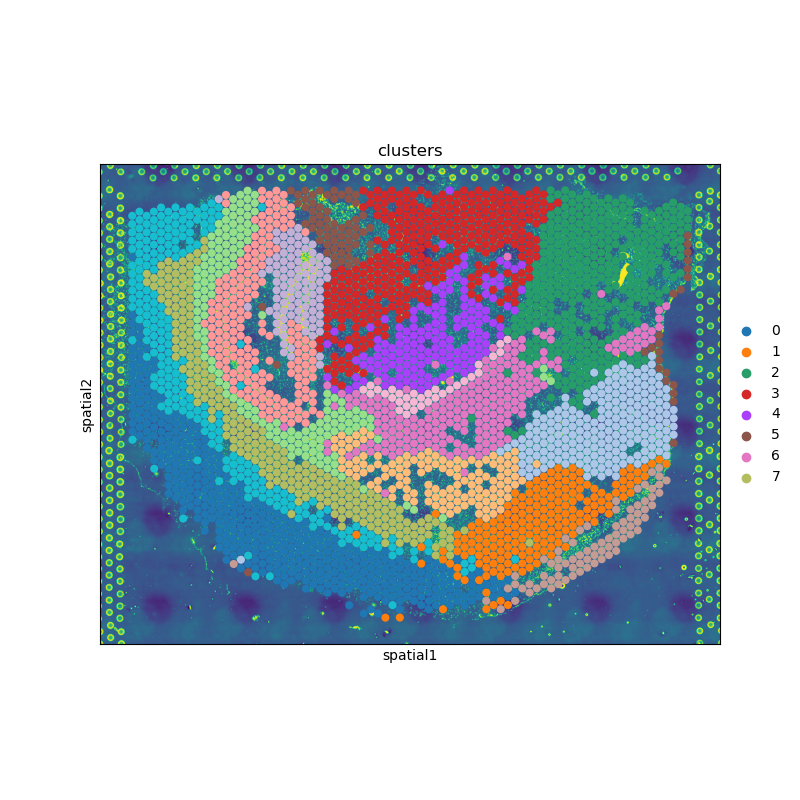

In [92]:
sc.pl.spatial(adata_st_test, img_key="hires", color="clusters", size=1.5)

In [248]:
adata_st_test.uns['spatial']['outVis1_A1_210610']['images']['lowres'].shape

(600, 600)

In [245]:
adata_st_test.uns['spatial']

{'outVis1_A1_210610': {'images': {'hires': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
           1.        ],
          [1.        , 1.        , 1.        , ..., 0.9996643 , 0.99964905,
           0.9996643 ],
          [1.        , 1.        , 1.        , ..., 0.7380026 , 0.73223466,
           0.73344016],
          ...,
          [1.        , 1.        , 1.        , ..., 0.39580378, 0.40817884,
           0.39649042],
          [1.        , 1.        , 1.        , ..., 0.40241092, 0.41329062,
           0.42020294],
          [1.        , 1.        , 1.        , ..., 0.42716107, 0.4422217 ,
           0.4428626 ]], dtype=float32),
   'lowres': array([[0.99536127, 0.88485545, 0.83849853, ..., 0.8162051 , 0.8181277 ,
           0.8220645 ],
          [0.9819333 , 0.5568475 , 0.38448158, ..., 0.30525672, 0.31303883,
           0.3238575 ],
          [0.98069733, 0.52729076, 0.33838406, ..., 0.27354848, 0.27681392,
           0.29068437],
          ...,
   

In [103]:
adata_st_test.obsm['spatial'].shape

(3093, 2)

In [108]:
adata_st_test.obsm['spatial'][:,0]

array([ 847, 1011, 4036, ..., 4090, 4793, 1227])

<IPython.core.display.Javascript object>


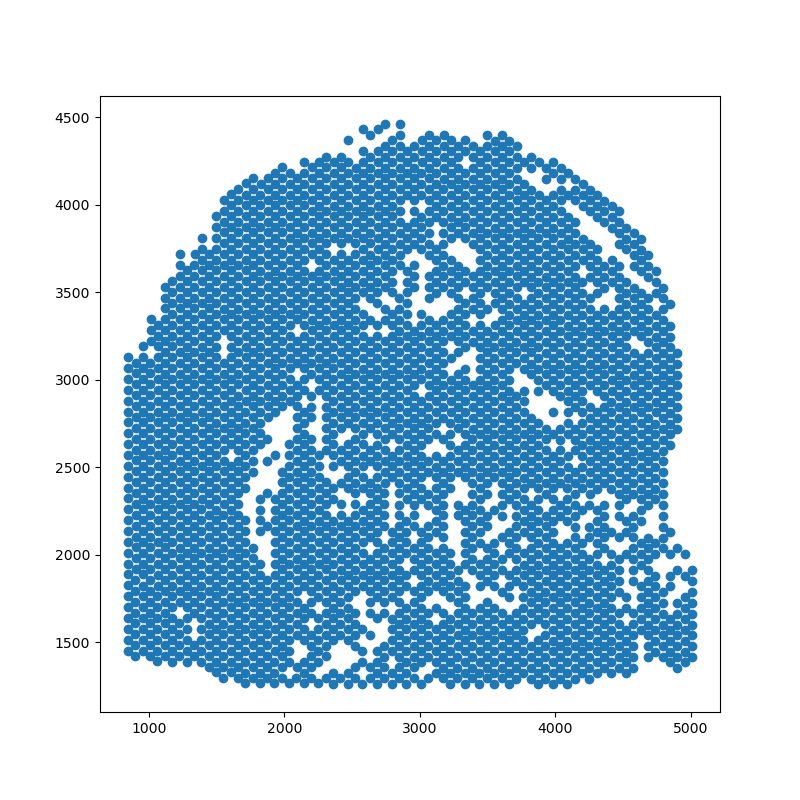

In [178]:
fig, ax = plt.subplots()
ax.scatter(adata_st_test.obsm['spatial'][:,0], adata_st_test.obsm['spatial'][:,1])
plt.show()

In [179]:
mask = adata_st_test.obsm['spatial'].astype('bool')

In [180]:
mask = np.invert(mask)

In [159]:
np.where(adata_st_test.obsm['spatial'][:,0]>3000)

(array([   2,    3,    4, ..., 3089, 3090, 3091]),)

In [160]:
np.where(adata_st_test.obsm['spatial'][:,1]>3000)

(array([   9,   11,   13, ..., 3084, 3086, 3088]),)

In [181]:
mask[np.where(adata_st_test.obsm['spatial'][:,0]>3000),0] = True

In [182]:
mask[np.where(adata_st_test.obsm['spatial'][:,1]>3000),1] = True

In [183]:
mask = mask[:, 0] & mask[:, 1]

In [184]:
mask = np.array([mask, mask]).T

<IPython.core.display.Javascript object>


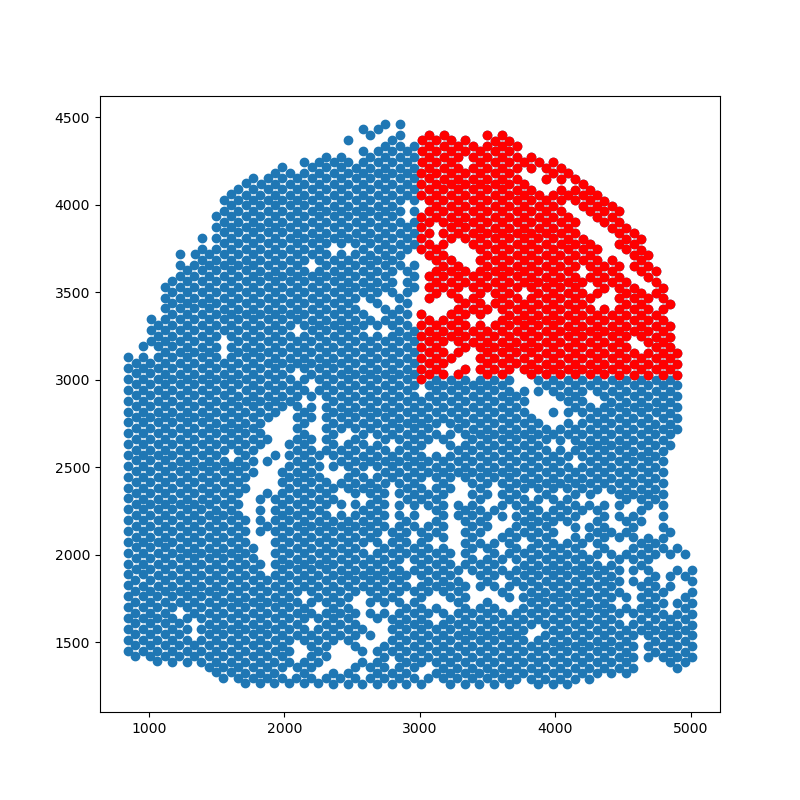

In [186]:
fig, ax = plt.subplots()
ax.scatter(adata_st_test.obsm['spatial'][:,0], adata_st_test.obsm['spatial'][:,1])
ax.scatter(adata_st_test.obsm['spatial'][np.where(mask[:,0]==True),0], adata_st_test.obsm['spatial'][np.where(mask[:,0]==True),1], c = 'r')
plt.show()

In [198]:
adata_st_test.obs

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACAACGAATAGTTC-1          1          0         16     a               4870   
AAACAATCTACTAGCA-1          1          3         43     a               2557   
AAACACCAATAACTGC-1          1         59         19     a               3701   
AAACAGCTTTCAGAAG-1          1         43          9     a               4988   
AAACAGGGTCTATATT-1          1         47         13     a               5486   
...                       ...        ...        ...   ...                ...   
TTGTTGTGTGTCAAGA-1          1         31         77     a               4022   
TTGTTTCACATCCAGG-1          1         58         42     a               2750   
TTGTTTCATTAGTCTA-1          1         60         30     a               2833   
TTGTTTGTATTACACG-1          1         73         41     a               3137   
TTGTTTGTGTAAATTC-1          1          7         51     a               3323   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAACGAATAGTTC-1                 8.491055       14428.0            9.576996   
AAACAATCTACTAGCA-1                 7.846981        4825.0            8.481773   
AAACACCAATAACTGC-1                 8.216628        9667.0            9.176577   
AAACAGCTTTCAGAAG-1                 8.514991       14997.0            9.615672   
AAACAGGGTCTATATT-1                 8.610137       18443.0            9.822495   
...                                     ...           ...                 ...   
TTGTTGTGTGTCAAGA-1                 8.299783       10501.0            9.259321   
TTGTTTCACATCCAGG-1                 7.919720        6639.0            8.800867   
TTGTTTCATTAGTCTA-1                 7.949444        6375.0            8.760296   
TTGTTTGTATTACACG-1                 8.051341        7091.0            8.866723   
TTGTTTGTGTAAATTC-1                 8.108924        7578.0            8.933137   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAACGAATAGTTC-1                   24.189077                    29.685334   
AAACAATCTACTAGCA-1                   20.082902                    26.487047   
AAACACCAATAACTGC-1                   25.892211                    31.716148   
AAACAGCTTTCAGAAG-1                   24.518237                    29.792625   
AAACAGGGTCTATATT-1                   22.377054                    27.983517   
...                                        ...                          ...   
TTGTTGTGTGTCAAGA-1                   20.578992                    26.426055   
TTGTTTCACATCCAGG-1                   30.667269                    36.978461   
TTGTTTCATTAGTCTA-1                   25.113725                    31.498039   
TTGTTTGTATTACACG-1                   28.571429                    34.762375   
TTGTTTGTGTAAATTC-1                   22.882027                    28.477171   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAACGAATAGTTC-1                    37.004436                    50.242584   
AAACAATCTACTAGCA-1                    35.150259                    50.901554   
AAACACCAATAACTGC-1                    39.722768                    53.832626   
AAACAGCTTTCAGAAG-1                    36.787357                    49.283190   
AAACAGGGTCTATATT-1                    35.319633                    48.690560   
...                                         ...                          ...   
TTGTTGTGTGTCAAGA-1                    34.739549                    49.871441   
TTGTTTCACATCCAGG-1                    45.564091                    59.783100   
TTGTTTCATTAGTCTA-1                    40.439216                    55.858824   
TTGTTTGTATTACACG-1                    42.490481                    55.859540   
TTGTTTGTGTAAATTC-1                    36.302454                    50.989707   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAACGAATAGTTC-1           2197.0               7.695303      15.227336   
AAACAATCTACTAGCA-1    

In [210]:
adata_st_test.obs[mask[:,0]]

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACGGTTGCGAACTG-1          1         67         59     a               2361   
AAACTGCTGGCTCCAA-1          1         45         67     a               3441   
AAAGTGTGATTTATCT-1          1         44         94     a               3657   
AAAGTTGACTCCCGTA-1          1         42         96     a               2421   
AAATACCTATAAGCAT-1          1         47         69     a               4260   
...                       ...        ...        ...   ...                ...   
TTGGGAAGACGAGCCG-1          1         68         64     a               1931   
TTGTGAACCTAATCCG-1          1         56         90     a               4155   
TTGTGCAGCCACGTCA-1          1         60         74     a               2896   
TTGTGTATGCCACCAA-1          1         56         60     a               2464   
TTGTGTTTCCCGAAAG-1          1         51         59     a               3462   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACGGTTGCGAACTG-1                 7.767264        4689.0            8.453188   
AAACTGCTGGCTCCAA-1                 8.143808        8806.0            9.083302   
AAAGTGTGATTTATCT-1                 8.204672        8879.0            9.091557   
AAAGTTGACTCCCGTA-1                 7.792349        4844.0            8.485703   
AAATACCTATAAGCAT-1                 8.357259       12032.0            9.395409   
...                                     ...           ...                 ...   
TTGGGAAGACGAGCCG-1                 7.566311        3798.0            8.242494   
TTGTGAACCTAATCCG-1                 8.332308       10497.0            9.258940   
TTGTGCAGCCACGTCA-1                 7.971431        6202.0            8.732788   
TTGTGTATGCCACCAA-1                 7.809947        4806.0            8.477828   
TTGTGTTTCCCGAAAG-1                 8.149891        8867.0            9.090204   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACGGTTGCGAACTG-1                   25.634464                    31.819151   
AAACTGCTGGCTCCAA-1                   29.150579                    35.180559   
AAAGTGTGATTTATCT-1                   20.970830                    27.480572   
AAAGTTGACTCCCGTA-1                   23.554913                    29.995871   
AAATACCTATAAGCAT-1                   26.304854                    32.164229   
...                                        ...                          ...   
TTGGGAAGACGAGCCG-1                   30.437072                    36.703528   
TTGTGAACCTAATCCG-1                   21.510908                    26.960084   
TTGTGCAGCCACGTCA-1                   23.202193                    29.377620   
TTGTGTATGCCACCAA-1                   22.992093                    29.026217   
TTGTGTTTCCCGAAAG-1                   26.536596                    32.682982   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACGGTTGCGAACTG-1                    39.987204                    55.384943   
AAACTGCTGGCTCCAA-1                    42.857143                    56.109471   
AAAGTGTGATTTATCT-1                    35.803581                    50.658858   
AAAGTTGACTCCCGTA-1                    38.645747                    54.438481   
AAATACCTATAAGCAT-1                    39.727394                    53.100066   
...                                         ...                          ...   
TTGGGAAGACGAGCCG-1                    45.339652                    61.716693   
TTGTGAACCTAATCCG-1                    34.609889                    48.823473   
TTGTGCAGCCACGTCA-1                    37.745888                    53.369881   
TTGTGTATGCCACCAA-1                    37.473991                    52.913025   
TTGTGTTTCCCGAAAG-1                    40.735311                    54.934025   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACGGTTGCGAACTG-1            731.0               6.595780      15.589678   
AAACTGCTGGCTCCAA-1    

In [215]:
adata_st_test.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 9485749 stored elements and shape (3093, 15091)>

In [214]:
adata_st_test.X[mask[:,0],:]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1857184 stored elements and shape (582, 15091)>

In [218]:
adata_st_test.var

gene_ids    feature_types genome     mt  \
Xkr4            ENSMUSG00000051951  Gene Expression   mm10  False   
Sox17           ENSMUSG00000025902  Gene Expression   mm10  False   
Mrpl15          ENSMUSG00000033845  Gene Expression   mm10  False   
Lypla1          ENSMUSG00000025903  Gene Expression   mm10  False   
Tcea1           ENSMUSG00000033813  Gene Expression   mm10  False   
...                            ...              ...    ...    ...   
Spry3           ENSMUSG00000061654  Gene Expression   mm10  False   
Tmlhe           ENSMUSG00000079834  Gene Expression   mm10  False   
PISD            ENSMUSG00000095041  Gene Expression   mm10  False   
DHRSX           ENSMUSG00000063897  Gene Expression   mm10  False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression   mm10  False   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                           71     0.020686           0.020475   
Sox17                         115     0.034004           0.033439   
Mrpl15                       1061     0.383678           0.324745   
Lypla1                        704     0.240578           0.215577   
Tcea1                        1498     0.619439           0.482080   
...                           ...          ...                ...   
Spry3                         192     0.058373           0.056733   
Tmlhe                          15     0.004250           0.004241   
PISD                         2039     1.100312           0.742086   
DHRSX                         273     0.084160           0.080805   
CAAA01147332.1                 15     0.004250           0.004241   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        97.988099          73.0            4.304065   
Sox17                       96.741286         120.0            4.795791   
Mrpl15                      69.934826        1354.0            7.211557   
Lypla1                      80.051006         849.0            6.745236   
Tcea1                       57.551714        2186.0            7.690286   
...                               ...           ...                 ...   
Spry3                       94.559365         206.0            5.332719   
Tmlhe                       99.574950          15.0            2.772589   
PISD                        42.221593        3883.0            8.264621   
DHRSX                       92.264097         297.0            5.697093   
CAAA01147332.1              99.574950          15.0            2.772589   

                n_cells  highly_variable     means  dispersions  \
Xkr4                 64            False  0.019991     0.343601   
Sox17               103             True  0.037429     0.442513   
Mrpl15              946            False  0.310186     0.225739   
Lypla1              631            False  0.194832     0.193089   
Tcea1              1342            False  0.451928     0.163058   
...                 ...              ...       ...          ...   
Spry3               171            False  0.053205     0.296634   
Tmlhe                12             True  0.004009     0.513542   
PISD               1839            False  0.726759     0.405308   
DHRSX               239            False  0.075381     0.287935   
CAAA01147332.1       14            False  0.004346     0.134179   

                dispersions_norm  
Xkr4                    0.554285  
Sox17                   1.119040  
Mrpl15                 -0.319722  
Lypla1                 -0.305088  
Tcea1                  -0.681228  
...                          ...  
Spry3                   0.286122  
Tmlhe                   1.524590  
PISD                    0.349649  
DHRSX                   0.236450  
CAAA01147332.1         -0.641447  

[15091 rows x 15 columns]

In [235]:
adata_st_test.obsm['spatial'][mask[:,0]]

array([[4470, 3092],
       [3281, 3342],
       [3229, 4180],
       ...,
       [4092, 3558],
       [3875, 3123],
       [3605, 3093]])

In [236]:
np.mean(adata_st_test.obsm['spatial'][mask[:,0]], axis=0)

array([3825.23367698, 3620.0652921 ])

In [226]:
#get subset version using mask
adata_st_test_subset = sc.AnnData(adata_st_test.X[mask[:,0],:],adata_st_test.obs[mask[:,0]],adata_st_test.var)

In [227]:
adata_st_test_subset

AnnData object with n_obs × n_vars = 582 × 15091
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [238]:
#add updated spatial coords
adata_st_test_subset.obsm['spatial'] = adata_st_test.obsm['spatial'][mask[:,0]]

In [239]:
adata_st_test_subset.obsm['spatial']

array([[4470, 3092],
       [3281, 3342],
       [3229, 4180],
       ...,
       [4092, 3558],
       [3875, 3123],
       [3605, 3093]])

In [252]:
adata_st_test.uns['spatial']

{'outVis1_A1_210610': {'images': {'hires': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
           1.        ],
          [1.        , 1.        , 1.        , ..., 0.9996643 , 0.99964905,
           0.9996643 ],
          [1.        , 1.        , 1.        , ..., 0.7380026 , 0.73223466,
           0.73344016],
          ...,
          [1.        , 1.        , 1.        , ..., 0.39580378, 0.40817884,
           0.39649042],
          [1.        , 1.        , 1.        , ..., 0.40241092, 0.41329062,
           0.42020294],
          [1.        , 1.        , 1.        , ..., 0.42716107, 0.4422217 ,
           0.4428626 ]], dtype=float32),
   'lowres': array([[0.99536127, 0.88485545, 0.83849853, ..., 0.8162051 , 0.8181277 ,
           0.8220645 ],
          [0.9819333 , 0.5568475 , 0.38448158, ..., 0.30525672, 0.31303883,
           0.3238575 ],
          [0.98069733, 0.52729076, 0.33838406, ..., 0.27354848, 0.27681392,
           0.29068437],
          ...,
   

In [249]:
#add Scale Factor from adata_st_test.uns['spatial']
adata_st_test_subset.uns['spatial'] = adata_st_test.uns['spatial']

In [250]:
adata_st_test_subset

AnnData object with n_obs × n_vars = 582 × 15091
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial'
    obsm: 'spatial'

In [93]:
#write to file

In [94]:
pwd

'/home/isaac/analysis/scRNA-seq'

In [95]:
output_path = '/bigdata/isaac/tangram_integration/'
adata_st_test.write(output_path +'adata_st_test.h5ad', compression='gzip')

In [251]:
output_path = '/bigdata/isaac/tangram_integration/'
adata_st_test_subset.write(output_path +'adata_st_test_subset.h5ad', compression='gzip')

# checkout tiff file(s)

Test image - tissue processing flow

In [43]:
img = sq.datasets.visium_fluo_image_crop()

In [44]:
type(img)

squidpy.im._container.ImageContainer

In [45]:
img

ImageContainer[shape=(7272, 7272), layers=['image']]

In [14]:
img['image']

<xarray.DataArray 'image' (y: 7272, x: 7272, z: 1, channels: 3)> Size: 317MB
dask.array<transpose, shape=(7272, 7272, 1, 3), dtype=uint16, chunksize=(7272, 7272, 1, 3), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) <U38 152B 'V1_Adult_Mouse_Brain_Coronal_Section_2'
Dimensions without coordinates: y, x, channels

In [34]:
img_processed = img.copy()

In [35]:
sq.im.process(img=img_processed, layer="image", method="smooth")
sq.im.segment(
    img=img_processed,
    layer="image_smooth",
    method="watershed",
    channel=0,
)

<IPython.core.display.Javascript object>


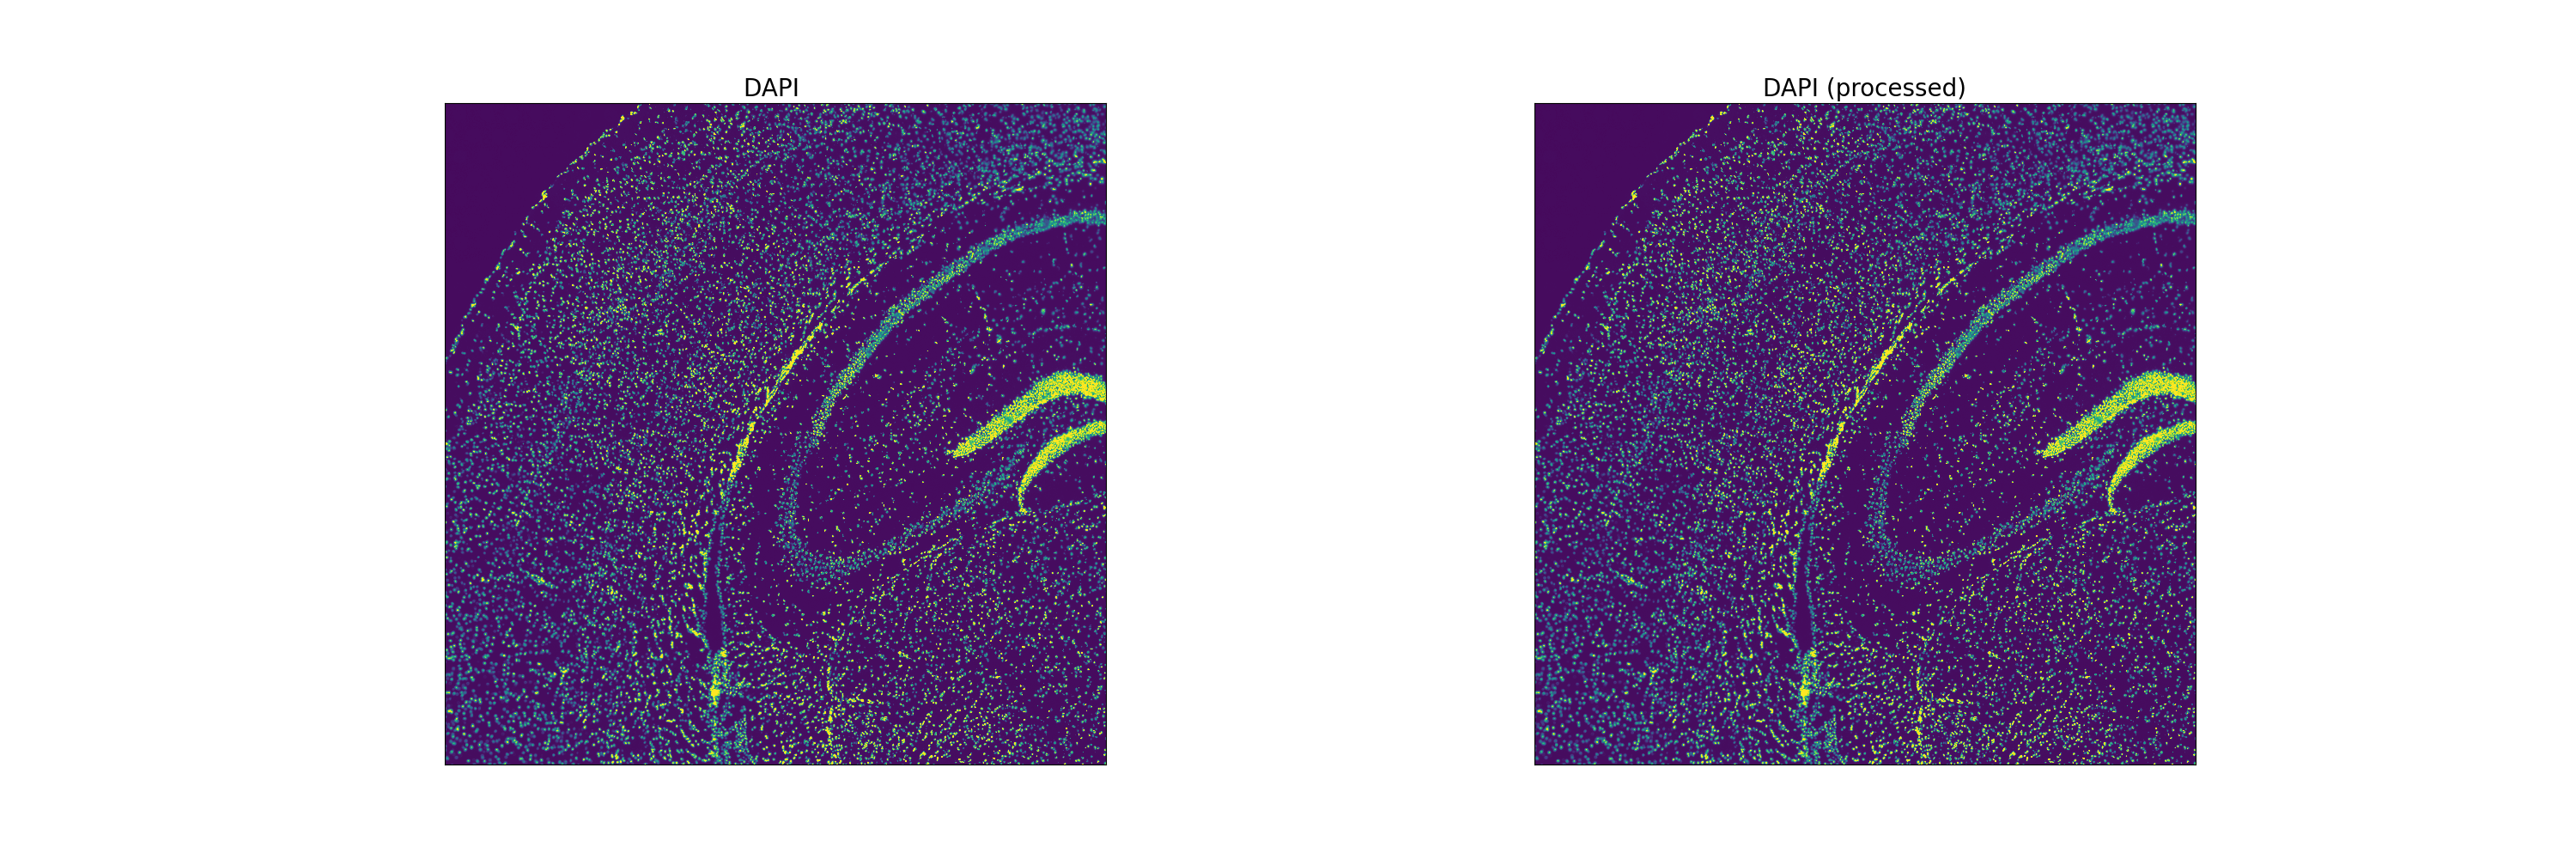

In [52]:
inset_y = 1500
inset_x = 1700
inset_sy = 400
inset_sx = 500

fig, axs = plt.subplots(1,2,figsize=(30, 10))
axs[0].imshow(
    img["image"][:,:, 0, 0]
    / 65536,
    interpolation="none",
)
axs[0].grid(False)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("DAPI ", fontdict={"fontsize": 20})

axs[1].imshow(
    img_processed["image"][:,:, 0, 0]
    / 65536,
    interpolation="none",
)
axs[1].grid(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("DAPI (processed)", fontdict={"fontsize": 20})

plt.show()

In [17]:
zoomed_img = img["image"][inset_y : inset_y + inset_sy, inset_x : inset_x + inset_sx, 0, 0]/ 65536

In [18]:
img["image"].shape

(7272, 7272, 1, 3)

In [19]:
zoomed_img.shape

(400, 500)

In [20]:
#try loading tiff image from sample
img_folder = '/data/runs/samples/Vis1_A1/'
img_vis1_a1 = sq.datasets.visium_hne_image(img_folder + 'Vis1_A1.tif')

In [21]:
img_vis1_a1['image']

<xarray.DataArray 'image' (y: 11757, x: 11291, z: 1, channels: 3)> Size: 398MB
dask.array<transpose, shape=(11757, 11291, 1, 3), dtype=uint8, chunksize=(11757, 11291, 1, 3), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) <U20 80B 'V1_Adult_Mouse_Brain'
Dimensions without coordinates: y, x, channels

In [22]:
img_folder = '/data/runs/samples/Vis1_A1/'
img_vis1_a1_gray = sq.datasets.visium_hne_image(img_folder + 'Vis1_A1_gray.tif')

In [23]:
img_vis1_a1_gray["image"]

<xarray.DataArray 'image' (y: 11757, x: 11291, z: 1, channels: 3)> Size: 398MB
dask.array<transpose, shape=(11757, 11291, 1, 3), dtype=uint8, chunksize=(11757, 11291, 1, 3), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) <U20 80B 'V1_Adult_Mouse_Brain'
Dimensions without coordinates: y, x, channels

<IPython.core.display.Javascript object>


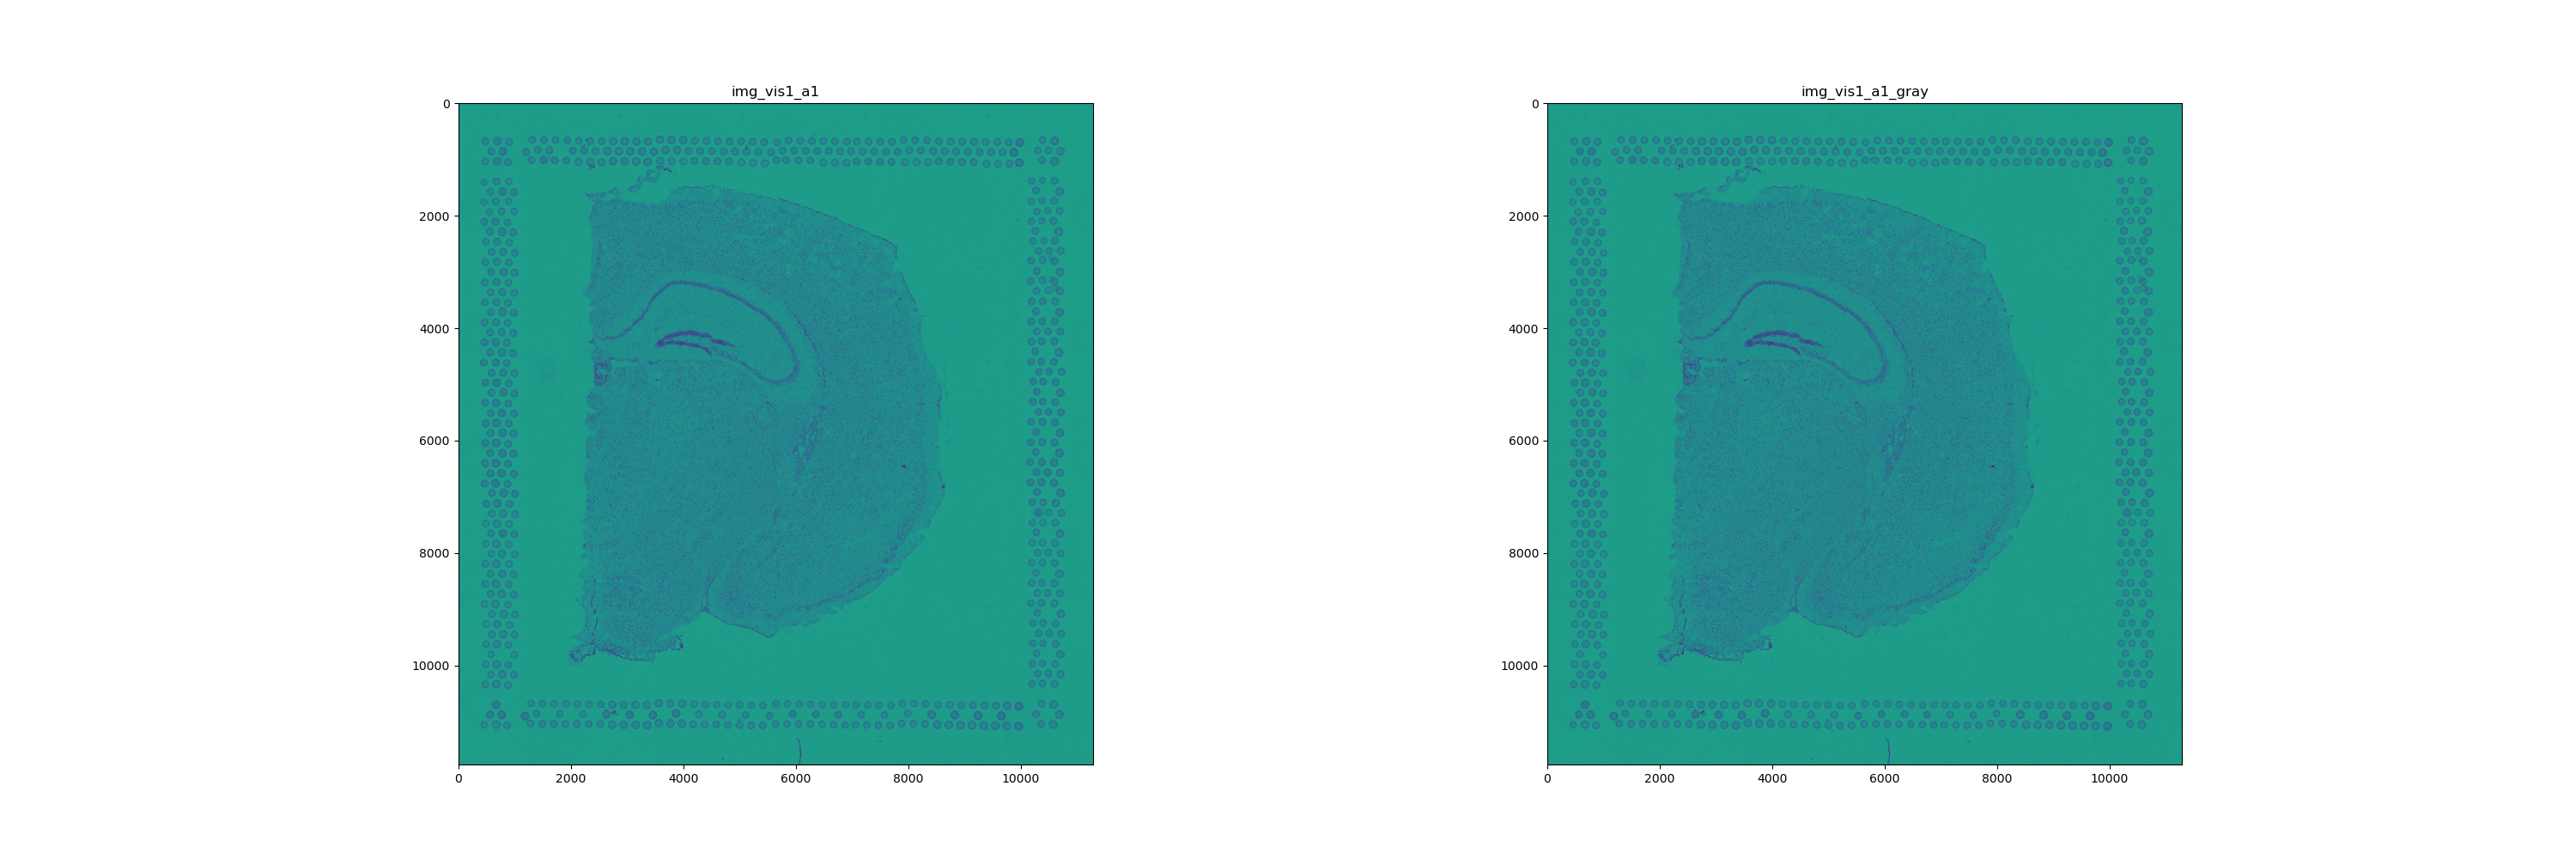

In [188]:
fig,axs = plt.subplots(1,2, figsize = (30,10))
axs[0].imshow(img_vis1_a1['image'][:,:, 0, 0])
axs[0].set_title('img_vis1_a1')
axs[1].imshow(img_vis1_a1_gray['image'][:,:, 0, 0])
axs[1].set_title('img_vis1_a1_gray')
plt.show()

No apparent difference between _a1 and _a1_gray...

Do Image Processing and compare with original

In [25]:
img_vis1_a1_processed = img_vis1_a1.copy()

In [189]:
sq.im.process(img=img_vis1_a1_processed, layer="image", method="smooth")
sq.im.segment(
    img=img_vis1_a1_processed,
    layer="image_smooth",
    method="watershed",
    channel=0,
)

<IPython.core.display.Javascript object>


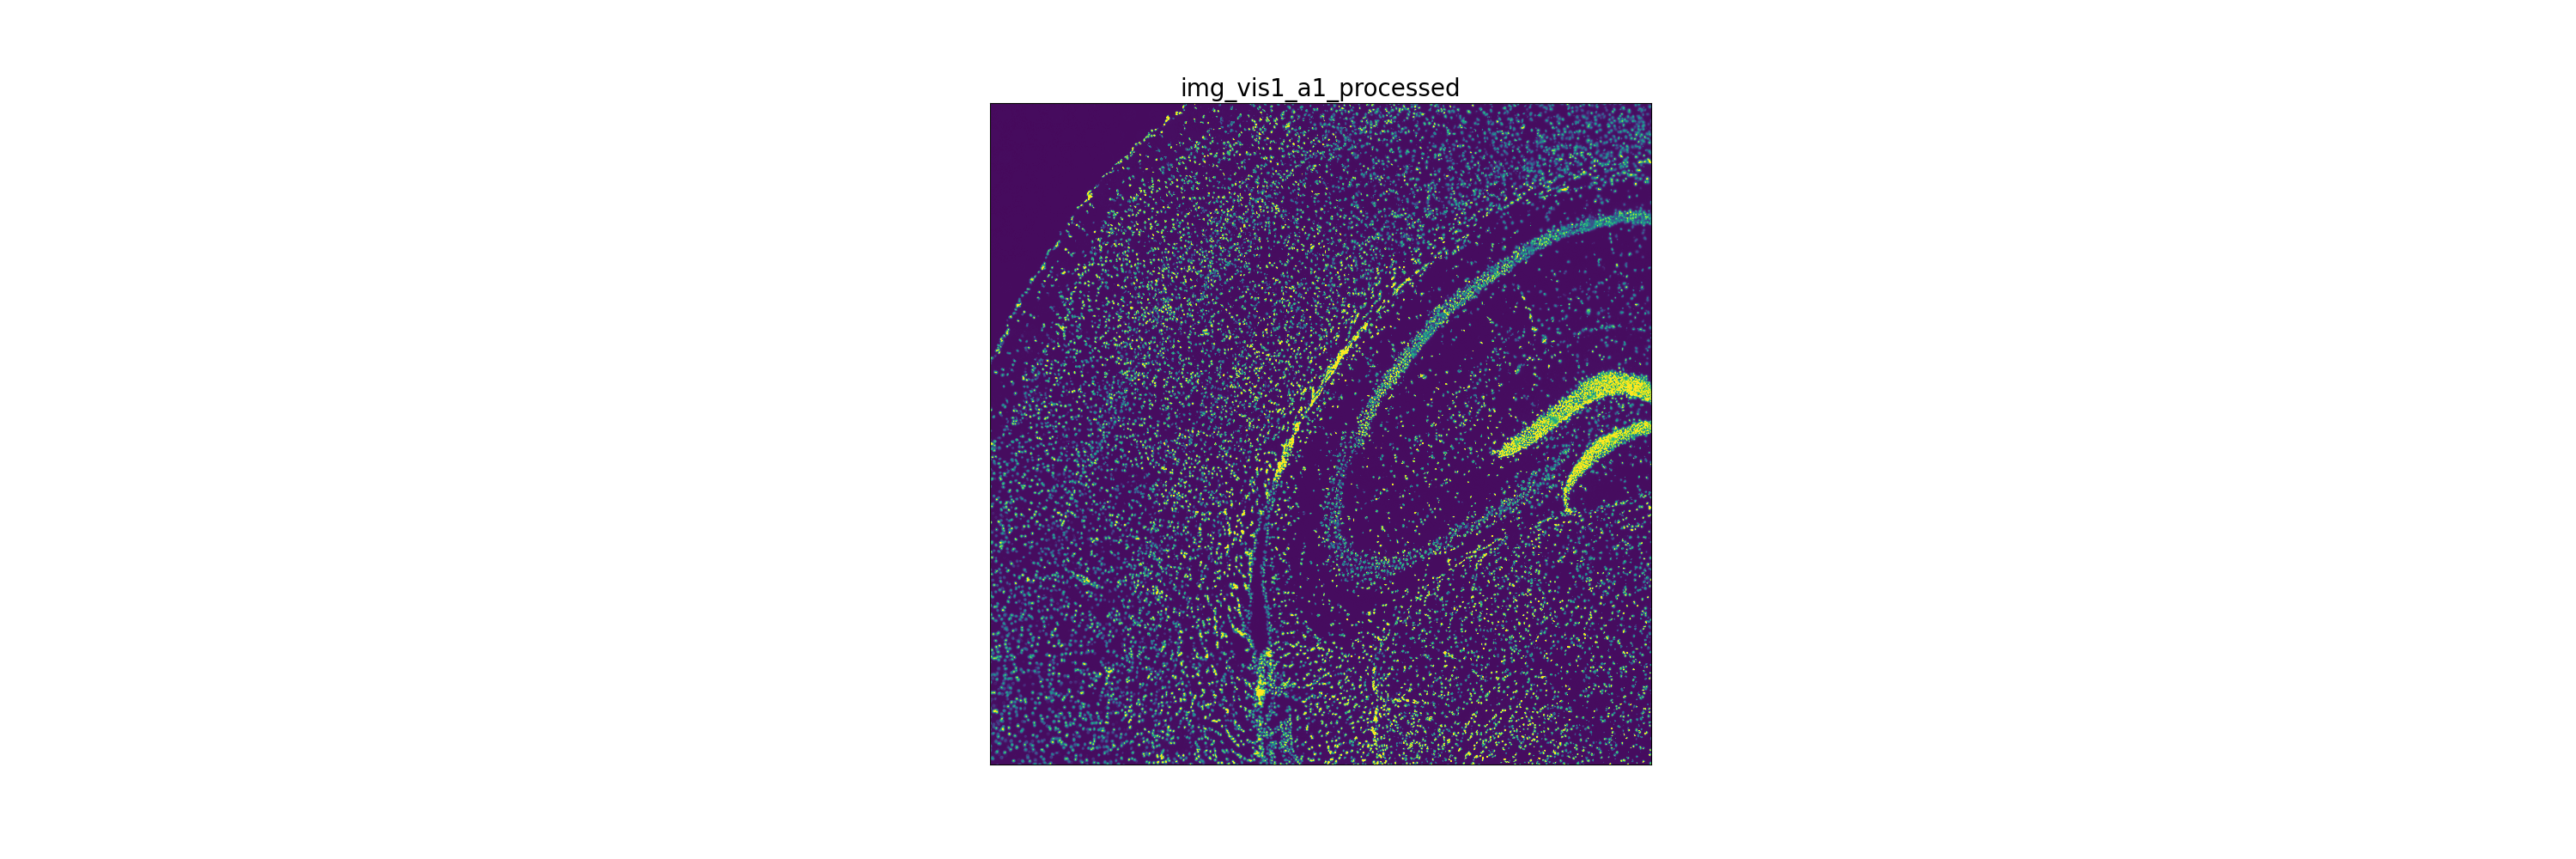

In [190]:
fig, axs = plt.subplots(figsize=(30, 10))

axs.imshow(
    img["image"][:,:, 0, 0],
    interpolation="none",
)
axs.grid(False)
axs.set_xticks([])
axs.set_yticks([])
axs.set_title("img_vis1_a1_processed", fontdict={"fontsize": 20})

plt.show()